# Исследование закономерностей, определяющих успешность видеоигр.

# Описание проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеем данные до 2016 года, сейчас декабрь 2016 г. (данные за 2016 г. не полные) и планируется кампания на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Загрузка данных, изучение информации

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import scipy.stats as st
from scipy.stats import binom, norm
from math import factorial
from math import sqrt

Загружаем файл с данными и сохраняем его в переменную data:

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
pd.set_option('display.max_columns', None)
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Изучим основную информацию о датафрейме:

In [3]:
print(data.info())
print()
print('Размер датафрейма. Строк, столбцов:', data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Размер датафрейма. Строк, столбцов: (16715, 11)


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В численных данных аномальных значений не обнаружено.

**Вывод:** при изучении информации о датафреймах, было выявлено несоответствие типа данных: столбец 'Year_of_Release' имеет тип данных float64, столбец 'User_Score' имеет тип данных object - будут изменены на этапе предобработки данных. Некорректные названия столбцов будут исправлены.

Датафрейм содержит 11 столбцов, 16715 строк.

### Предобработка данных

#### Проверка корректной записи названий столбцов

In [5]:
data.columns.unique()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приводим названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.columns.unique()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод:** все названия столбцов переименованы.

#### Проверка наличия дубликатов

##### Явные дубликаты

In [7]:
data.duplicated().sum()

0

**Вывод:** явные дубликаты не обнаружены.

##### Неявные дубликаты

Проверим наличие неявных дубликатов по значениям столбцов: 'name', 'platform','year_of_release'.

In [8]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Удалим строки с неявными дубликатами и обновим индексацию:

In [9]:
data = data.drop(labels = [604, 659, 14244, 16230],axis = 0).reset_index(drop=True)
print('Проверяем:')
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

Проверяем:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Вывод:** неявные дубликаты удалены (4 строки).

#### Проверка наличия пропущенных значений и типов данных

In [10]:
print('Пропущенные значения:')
data.isna().sum()

Пропущенные значения:


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [11]:
print('Типы данных:')
data.dtypes

Типы данных:


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Обнаружены **пропуски в столбце 'year_of_release' - год выпуска**. Удалим строки с данными пропусками, т.к. нет информации о том, когда именно была выпущена игра и заполнить корректно такой пропуск нет возможности. Удаление 269 строк из 16711 - это 1.6% - на результат исследования не повлияют. С удалением пропусков обновим индексацию:

In [12]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
print('Проверяем. Пропущенные значения после удаления:', data['year_of_release'].isna().sum())

Проверяем. Пропущенные значения после удаления: 0


**Изменим тип данных в столбце 'year_of_release'** с float64 на int64, т.к. год выпуска не может быть вещественным числом:

In [13]:
data['year_of_release'] = data['year_of_release'].astype(int)
print('Проверяем. Тип данных после изменения:', data['year_of_release'].dtype)

Проверяем. Тип данных после изменения: int32


Проверим **пропуски в столбце 'user_score'** - оценка пользователей. Для начала посмотрим значения:

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято, служит для отметки неясностей или пропусков. То есть фактически это тот же NaN. Поэтому заменим 'tbd' на NaN:

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
print('Проверяем. Уникальные значения после замены:')
print()
print(data['user_score'].unique())
print()
print('Количество пропусков (NaN) в колонке с оценкой пользователей:', data['user_score'].isna().sum())

Проверяем. Уникальные значения после замены:

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Количество пропусков (NaN) в колонке с оценкой пользователей: 8981


**Изменим тип данных в столбце 'user_score'** с object на float64:

In [16]:
data['user_score'] = data['user_score'].astype(float)
print('Проверяем. Тип данных после изменения:', data['user_score'].dtype)

Проверяем. Тип данных после изменения: float64


Проверим **пропуски в столбце 'critic_score'** - оценка критиков:

In [17]:
print('Уникальные значения в колонке с оценкой критиков:')
print()
print(data['critic_score'].unique())
print()
print('Количество пропусков (NaN) в колонке с оценкой критиков:', data['critic_score'].isna().sum())

Уникальные значения в колонке с оценкой критиков:

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]

Количество пропусков (NaN) в колонке с оценкой критиков: 8461


**Пропуски в оценках пользователей и критиков могут означать**, что данные некорректно были загружены со сторонних ресурсов. В связи с чем будет некорректно заполнить пропуски каким-либо значением (будут искажения в данных) или удалить (8981 строка из 16715 и 8461 строка из 16715 - это больше половины всех данных). Пропуски оставляем.

Проверим **пропуски в столбце 'rating'** - рейтинг от организации ESRB:

In [18]:
data['rating'].isna().sum()

6676

Значения в 'rating' являются категориальными, поэтому заполнить их средним или медианным значениями не получится. Заменяем пропуски на 'unknown':

In [19]:
data['rating'] = data['rating'].fillna('unknown')
print('Проверяем. Пропущенные значения после замены:', data['year_of_release'].isna().sum())
print('Уникальные значения:', data['rating'].unique())

Проверяем. Пропущенные значения после замены: 0
Уникальные значения: ['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Пропуски могут означать, издатель не захотел получать рейтинговую оценку ESRB. Так же возможен вариант, что игра не планировалась выпускаться для стран Северной Америки.

**Вывод:** изменены типы данных: столбец 'year_of_release' с float64 на int64, столбец 'user_score' с object на float64. Обработаны пропуски: 
- в столбце 'year_of_release' - год выпуска. Удалены строки с пропусками, т.к. нет информации о том, когда именно была выпущена игра и заполнить корректно такой пропуск нет возможности. Удаление 269 строк из 16711 - это 1.6% - на результат исследования не повлияют;
- в столбце 'user_score' - оценка пользователей и 'critic_score' - оценка критиков - пропуски оставлены, они могут означать, что данные некорректно были загружены со сторонних ресурсов. В связи с чем будет некорректно заполнить пропуски каким-либо значением (будут искажения в данных) или удалить (8981 строка из 16715 и 8461 строка из 16715 - это больше половины всех данных). В столбце 'user_score' значения 'tbd' - информация еще не определена или решение по вопросу не принято, служит для отметки неясностей или пропусков. То есть фактически это тот же NaN. Поэтому заменили 'tbd' на NaN;
- в столбце 'rating' - рейтинг от организации ESRB - пропуски являются категориальными, поэтому заполнить их средним или медианным значениями не получится. Заменили пропуски на 'unknown'. Пропуски могут означать, издатель не захотел получать рейтинговую оценку ESRB. Так же возможен вариант, что игра не планировалась выпускаться для стран Северной Америки.

#### Подсчет суммарных продаж во всех регионах

Посчитаем суммарные продажи во всех регионах и сохраним результат в новый столбец 'total_sales':

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Вывод:** результат подсчета суммарных продаж добавлен в датафрейм (столбец 'total_sales')

#### Вывод по разделу

**В ходе выполнения предобработки данных было проведено:**
1. **проверка корректной записи названий столбцов**: исправлены (приведены к нижнему регистру);
2. **проверка наличия явных дубликатов**: не обнаружены;
3. **проверка наличия неявных дубликатов**: удалены (4 строки);
4. **проверка соответствия типов данных**: изменены (столбец 'year_of_release' с float64 на int64, столбец 'user_score' с object на float64);
5. **проверка наличия пропущенных значений**:
- в столбце 'year_of_release' - год выпуска - пропуски удалены;
- в столбцах 'user_score' - оценка пользователей и 'critic_score' - оценка критиков - пропуски оставлены. В столбце 'user_score' значения 'tbd' - информация еще не определена или решение по вопросу не принято, служит для отметки неясностей или пропусков. То есть фактически это тот же NaN. Поэтому заменили 'tbd' на NaN;
- в столбце 'rating' - рейтинг от организации ESRB - пропуски заполнили значением 'unknown'.

### Исследовательский анализ данных

#### Распределение количества игр по году выпуска

Проверяем сколько игр выпускалось в разные годы:

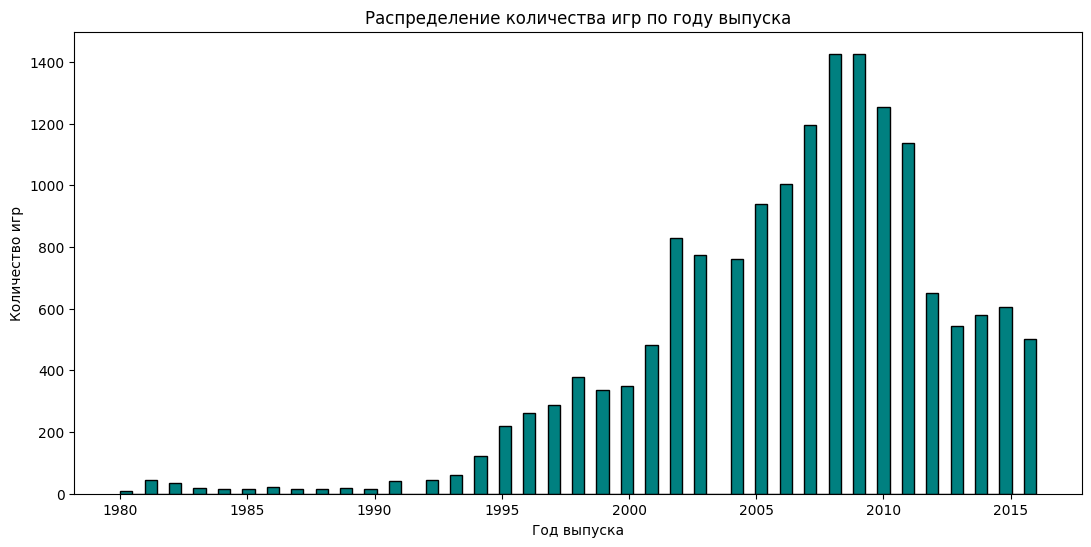

In [21]:
data.plot(y='year_of_release', kind='hist', legend=False, figsize=(13, 6), bins=75, edgecolor='black', color = 'teal')
plt.title('Распределение количества игр по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

In [22]:
print('Топ-5 годов выпуска и количество выпущенных игр:')
data['year_of_release'].value_counts().sort_values(ascending=False).head()

Топ-5 годов выпуска и количество выпущенных игр:


2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: year_of_release, dtype: int64

In [23]:
print('Анти-топ-5 годов выпуска и количество выпущенных игр:')
data['year_of_release'].value_counts().sort_values(ascending=False).tail()

Анти-топ-5 годов выпуска и количество выпущенных игр:


1987    16
1988    15
1985    14
1984    14
1980     9
Name: year_of_release, dtype: int64

**Вывод:** Имея данные с 1980 по 2016 годы, можно сделать вывод, что пик приходится на 2008 и 2009 года - 1427 и 1426 игр выпущено, меньше всего в 1980 году - всего 9. До 1995 года выпускалось до 200 игр в год. По мере развития игровой индустрии растет и количество выпущенных игр, но после пиков 2008-2009 годов пошел спад, а с 2012 года количество выпускаемых игр заметно сократилось, что может быть связано с развитием мобильных устройств и соц.сетей, что способствовало снижению интереса к видеоиграм.

#### Распределение продаж по платформам

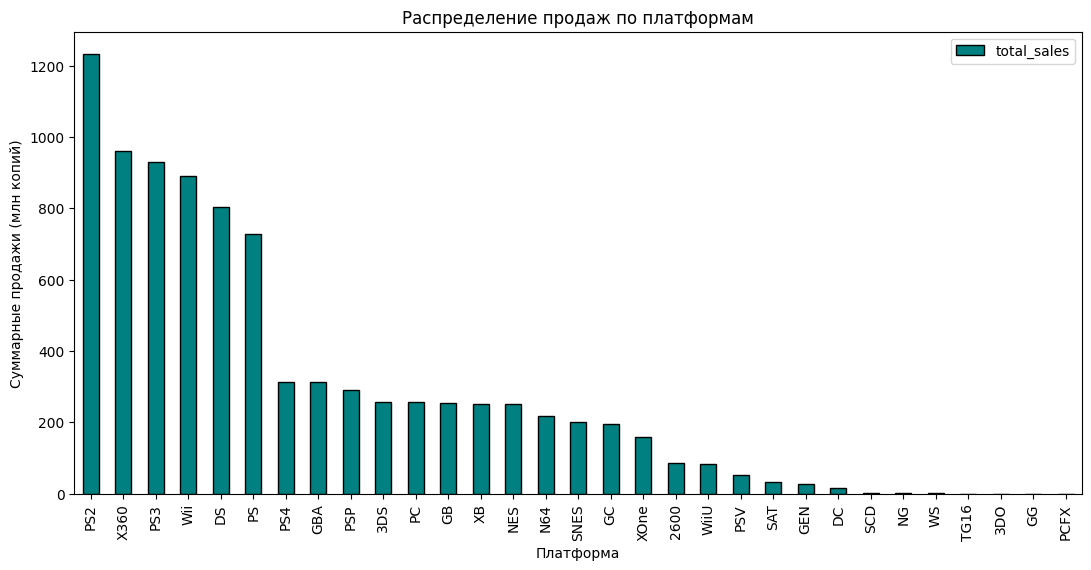

In [24]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                                    ascending=False).plot(kind='bar', 
                                                                                                          figsize=(13, 6), 
                                                                                                          edgecolor='black', 
                                                                                                          color = 'teal')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

**Вывод:** Лидер продаж - PS2 (PlayStation 2), вместе с ним в топ лидеров входят: PlayStation 3, Xbox 360 (Х360), Wii, Nintendo DS (DS), PlayStation.

Сохраним 5 платформ с наибольшими продажами в top_5:

In [25]:
top_5 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
print('Лидеры продаж:', top_5)

Лидеры продаж: platform
PS2     1233.56
X360     961.24
PS3      928.77
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64


Сохраним данные для топ-5 платформ с наибольшими продажами в отдельный датафрейм data_top_5:

In [26]:
data_top_5 = data.query('platform in @top_5.index')
data_top_5.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


Т.к. до 1995 года выпускалось менее 200 игр в год, продолжим анализ по данным, начиная с 1995 года включительно. Построим распределение суммарных продаж по годам для 5 лидеров (top_5):

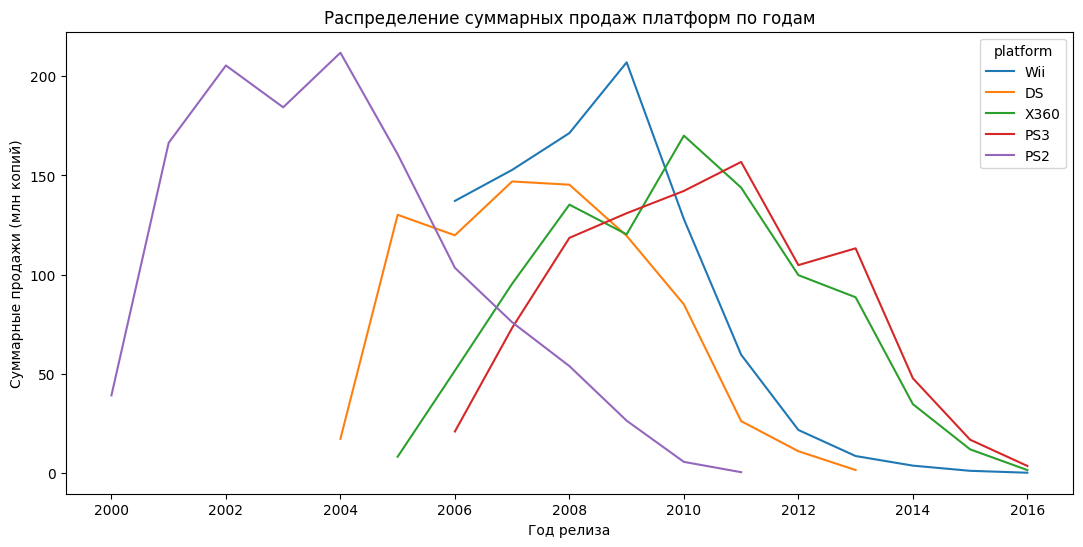

In [27]:
data_top_5 = data_top_5.query('year_of_release >= 1995')

plt.figure(figsize = (13, 6))
seaborn.lineplot(data=data_top_5, x='year_of_release', y='total_sales', hue='platform', estimator = 'sum', ci = None)
plt.title('Распределение cуммарных продаж платформ по годам')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

**Вывод:** рост продаж в среднем длится около 3-5 лет с момента релиза, потом начинается спад. Через 8-10 лет платформа теряет свою популярность. Дольше всех до сильного спада на рынке продержались Xbox 360 (Х360) и PlayStation 3. 

#### Распределение платформ по их сроку жизни

Рассчитаем "срок жизни" каждой платформы и визуализируем полученные данные:

Cрок жизни каждой платформы:


,life_year
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5



Характеристики:
count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: life_year, dtype: float64


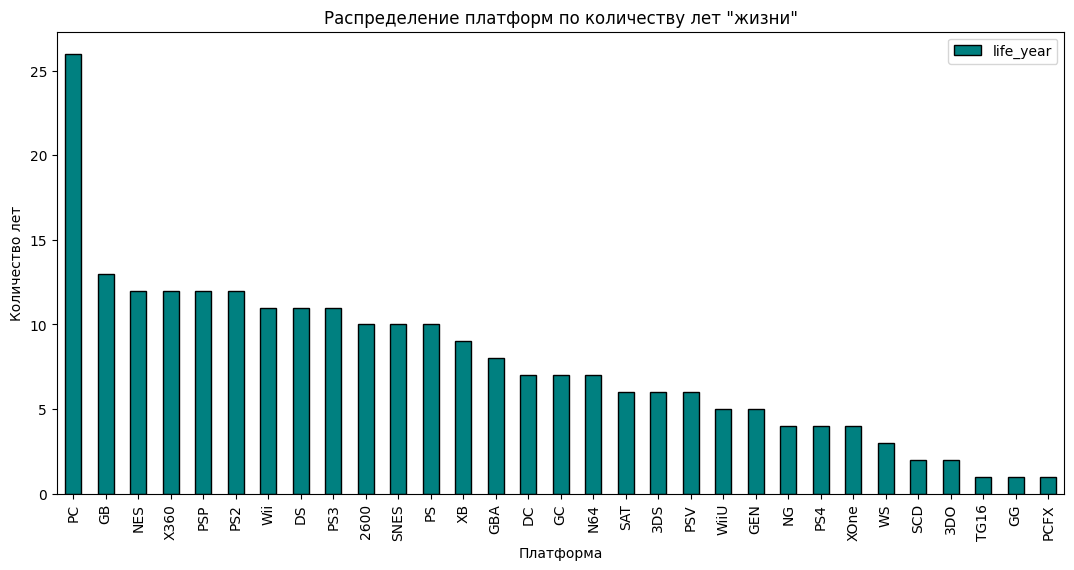

In [28]:
life_platform = data.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index='platform', 
                                                                                  values='year_of_release', 
                                                                                  aggfunc='count')
life_platform.columns = ['life_year']
print('Cрок жизни каждой платформы:')
display(life_platform)
print()

print('Характеристики:')
print(life_platform['life_year'].describe())

life_platform.sort_values(by='life_year', ascending=False).plot(kind='bar', figsize=(13, 6), edgecolor='black', color ='teal')
plt.title('Распределение платформ по количеству лет "жизни"')
plt.xlabel('Платформа')
plt.ylabel('Количество лет')
plt.show()

**Вывод:** в среднем платформы существуют 7-8 лет, минимальный срок - 1 год (TG16, PCFX, GG), максимальный - 26 лет (PlayStation).

Т.к. рост продаж в среднем длится около 3-5 лет с момента релиза и средний срок жизни плотформы 7-8 лет, определим **актуальный период для прогнозирования на 2017 год** - с 2014 по 2016 гг.

#### Определение потенциально прибыльных платформ

Актуальный период, на основе которого будет построен прогноз на 2017 год, определим с 2014 по 2016 годы, т.к. в среднем рост продаж с момента релиза наблюдается в течении 3-5 лет (данный период был определен в предыдущем пункте исследования).

Сделаем срез данных из исходного датафрейма, в котором будут отражены все данные, начиная с 2014 года включительно. Сохраним в новый датафрейм data_current:

In [29]:
data_current = data.query('year_of_release >= 2014').reset_index(drop=True)
data_current.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Отобразим на диаграмме суммарные продажи по платформам за период 2014-2016 годы:

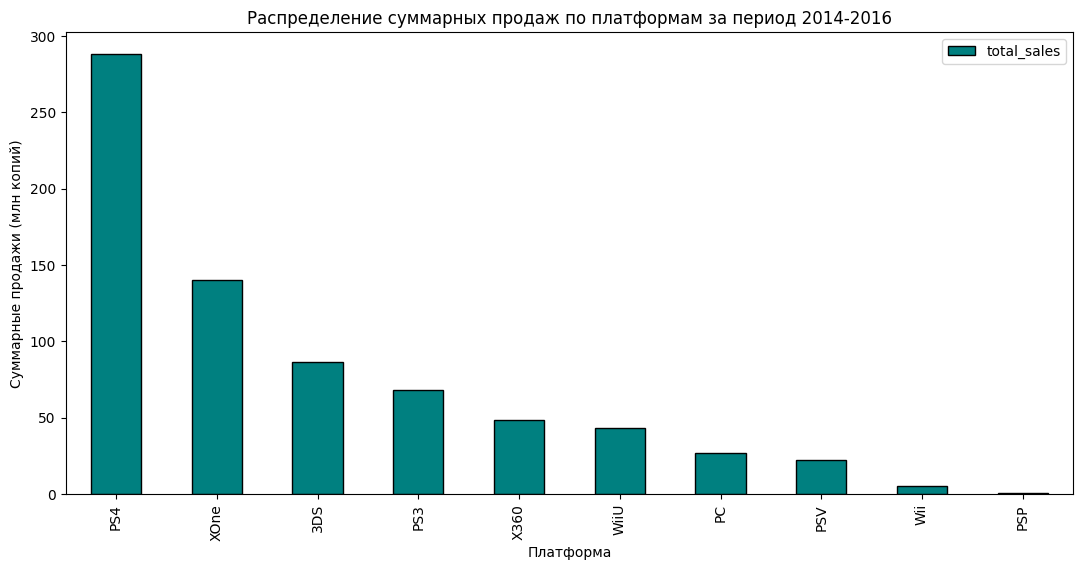

In [30]:
data_current.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                                    ascending=False).plot(kind='bar', 
                                                                                                          figsize=(13, 6), 
                                                                                                          edgecolor='black', 
                                                                                                          color = 'teal')
plt.title('Распределение суммарных продаж по платформам за период 2014-2016')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

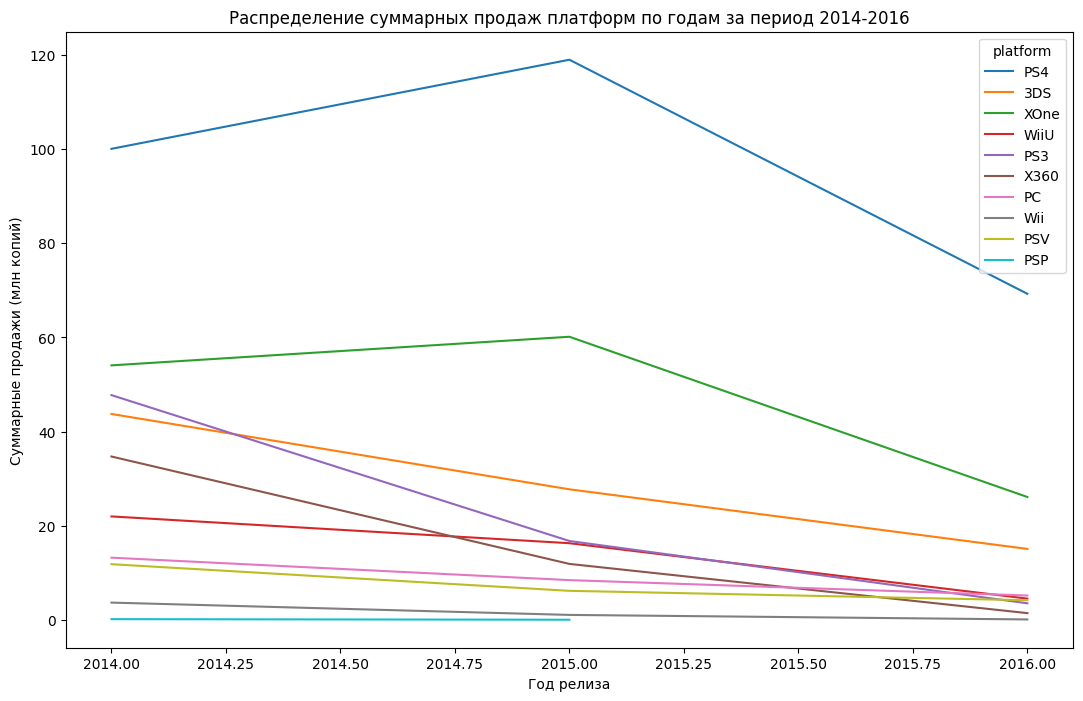

In [31]:
plt.figure(figsize = (13, 8))
seaborn.lineplot(data=data_current, x='year_of_release', y='total_sales', hue='platform', estimator = 'sum', ci = None)
plt.title('Распределение cуммарных продаж платформ по годам за период 2014-2016')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

**Вывод:** 6 самых прибыльных платформ за последние 3 года в порядке убывания: PS4, XOne, 3DS, PS3, X360, WiiU. Но c 2015 заметен спад продаж у большинства платформ. Перспективными на 2017 год можно считать платформы: PS4, XOne, 3DS.

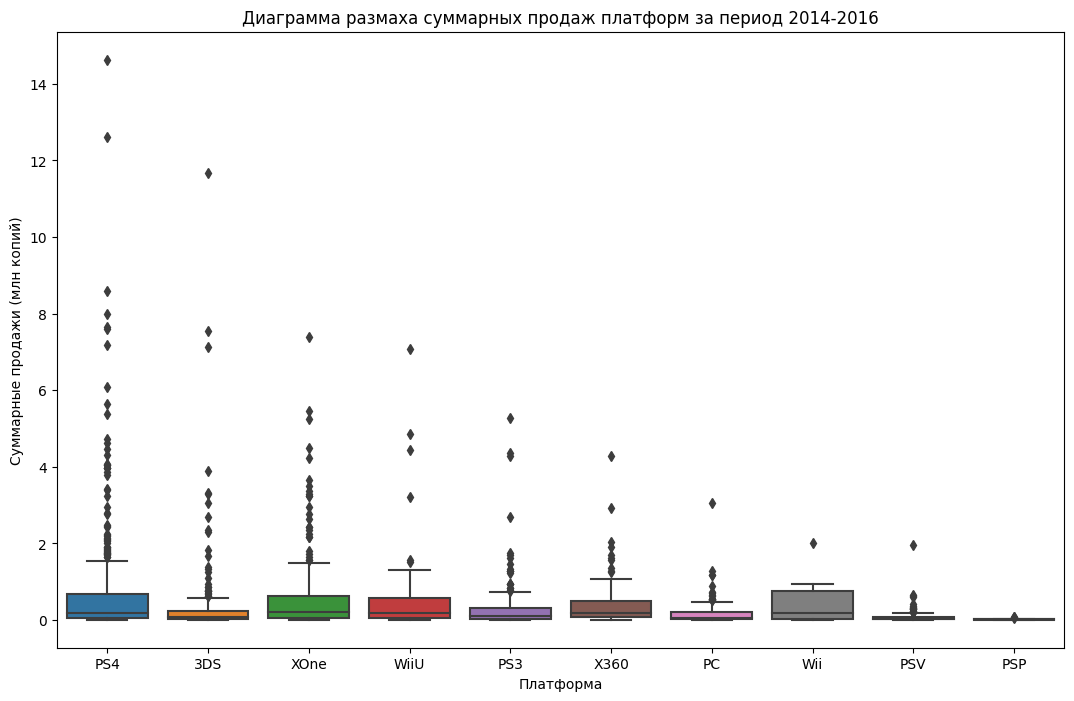

In [32]:
plt.figure(figsize = (13, 8))
seaborn.boxplot(data=data_current, x='platform', y='total_sales')
plt.title('Диаграмма размаха cуммарных продаж платформ за период 2014-2016')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

У каждой платформы имеются выбросы - бестселлеры продаж. Ограничим суммарные продажи в 2 млн по оси:

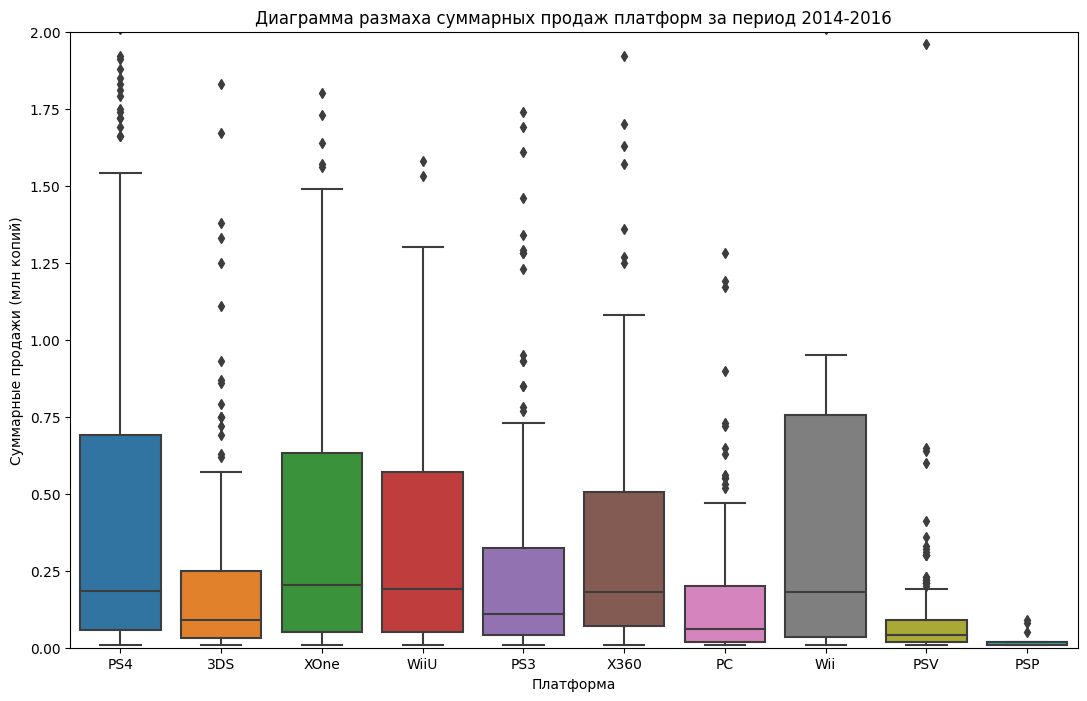

Числовые характеристики:


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [33]:
plt.figure(figsize = (13, 8))
plt.ylim(0, 2)
seaborn.boxplot(data=data_current, x='platform', y='total_sales')
plt.title('Диаграмма размаха cуммарных продаж платформ за период 2014-2016')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

print('Числовые характеристики:')
data_current.groupby('platform')['total_sales'].describe()

**Вывод:** распределение продаж по платформам говорит о том, что большинство платформ делают ставку на выход бестселлеров, о чем свидетельствуют выбросы. Заметно большое стандартное отклонение и сильное смещение среднего относительно медианы.

#### Влияние оценок критиков и пользователей на продажи

Для оценки влияния оценок критиков и пользователей на продажи рассмотрим одну из самых популярных платформ за актуальный период (2014-2016) - PlayStation4 (PS4). Соберем информацию о данной платформе в датафрейм data_ps4, где будут данные об оценках критиков, оценках пользователей и данные о продажах:

In [34]:
data_ps4 = data_current.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']]
data_ps4.head(10)

,critic_score,user_score,total_sales
0,NaN,NaN,14.63
1,97.0,8.3,12.62
3,82.0,4.3,8.58
4,NaN,NaN,7.98
5,83.0,5.7,7.66
6,85.0,5.0,7.60
9,87.0,6.5,7.17
12,82.0,5.7,6.08
13,76.0,6.1,5.64
15,93.0,7.9,5.39


Матрица корреляции:


,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


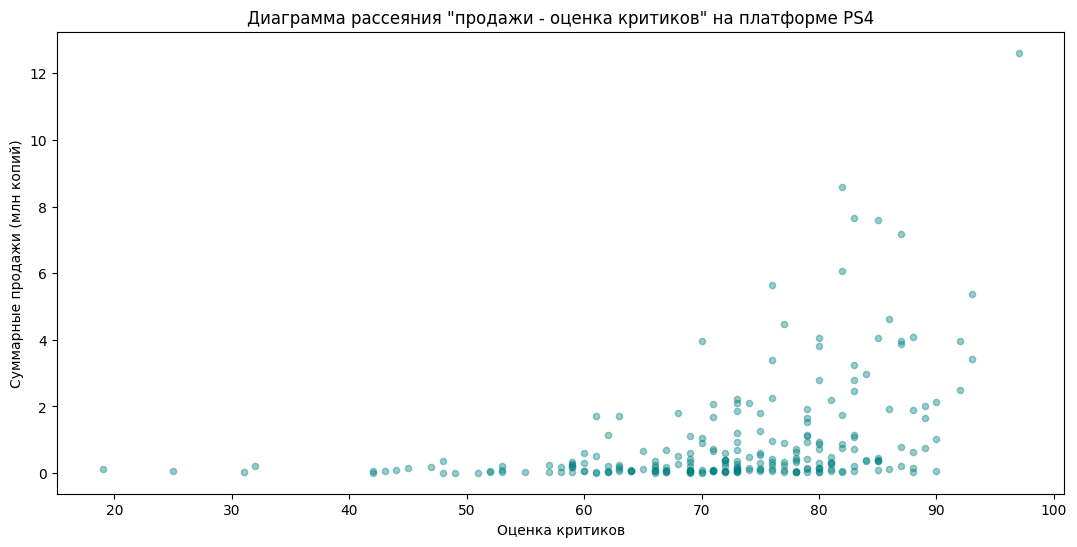

In [35]:
print('Матрица корреляции:')
display(data_ps4.corr())

data_ps4.plot(x='critic_score', y='total_sales', c='teal', kind='scatter', alpha=0.4, figsize=(13, 6))
plt.title('Диаграмма рассеяния "продажи - оценка критиков" на платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

**Вывод:** коэффициент корреляции "продажи - оценка критиков" равен 0.402661 - положительная корреляция. Количество продаж увеличивается с повышением оценки критиков, линейная связь.

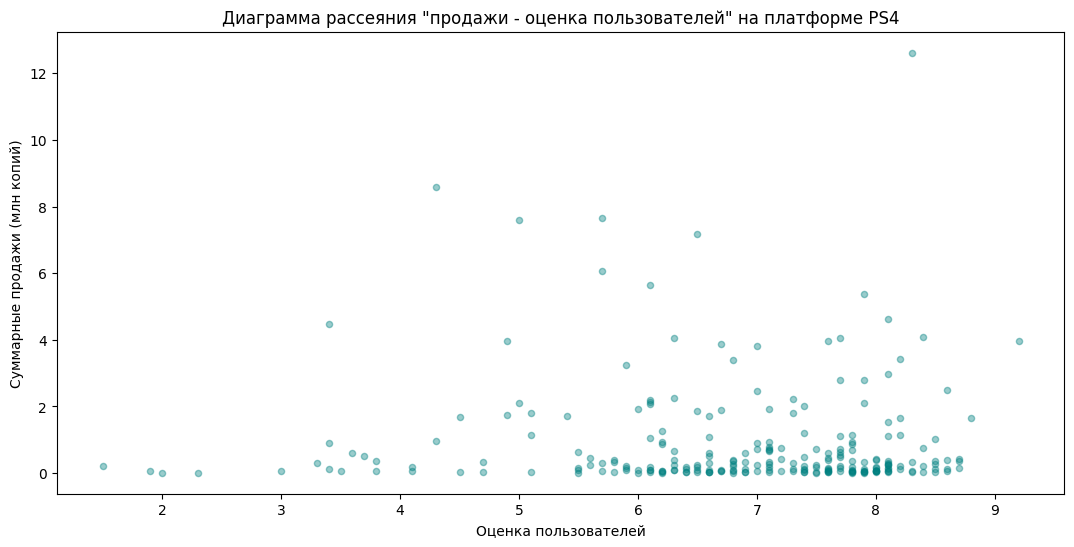

In [36]:
data_ps4.plot(x='user_score', y='total_sales', c='teal', kind='scatter', alpha=0.4, figsize=(13, 6))
plt.title('Диаграмма рассеяния "продажи - оценка пользователей" на платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

**Вывод:** коэффициент корреляции "продажи - оценка пользователей" равен -0.040132 - отрицательная корреляция, очень близкая к нулю - что говорит об отсутсвии либо очень слабой связи между величинами.

Сравним выводы исследованния о зависимости продаж от оценок платформы PlayStation4 (PS4) с другими популярными платформами. Создаем функцию для автоматизации построения диаграмм рассеяния по платформам и подсчета коэффициента корреляции зависимостей. Исследуемый период 2014-2016 гг.:

In [37]:
def data_scatter(dat, platform):
    fig, axis = plt.subplots(1,2, figsize=(15, 6))
    ax = seaborn.scatterplot(x='critic_score', y='total_sales', data = dat, hue='critic_score', alpha = 0.5, ax=axis[0])
    ax.set(xlabel = 'Оценка критиков', ylabel = 'Продажи (млн.копий)', title = platform)
    ax = seaborn.scatterplot(x='user_score', y='total_sales', data = dat, hue='user_score', alpha = 0.5, ax=axis[1]);
    ax.set(xlabel = 'Оценка пользователей', ylabel = 'Продажи (млн.копий)', title = platform)
    plt.show()
    print(f'Значение корреляции продаж и оценки критиков для платформы {platform}:', dat['total_sales'].corr(dat['critic_score']))
    print(f'Значение корреляции и оценки пользователей для платформы {platform}:', dat['total_sales'].corr(dat['user_score']))

Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе XOne


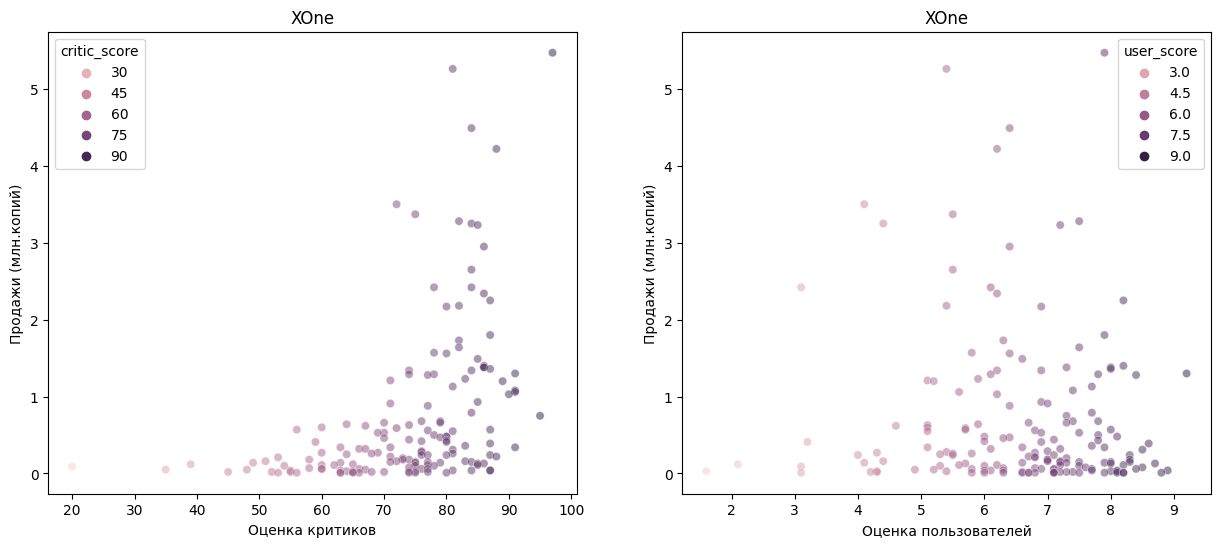

Значение корреляции продаж и оценки критиков для платформы XOne: 0.42867694370333187
Значение корреляции и оценки пользователей для платформы XOne: -0.07038392806475809


In [38]:
data_xone = data_current.query('platform == "XOne"')
print('Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе XOne')
data_scatter(data_xone, 'XOne')

Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе 3DS


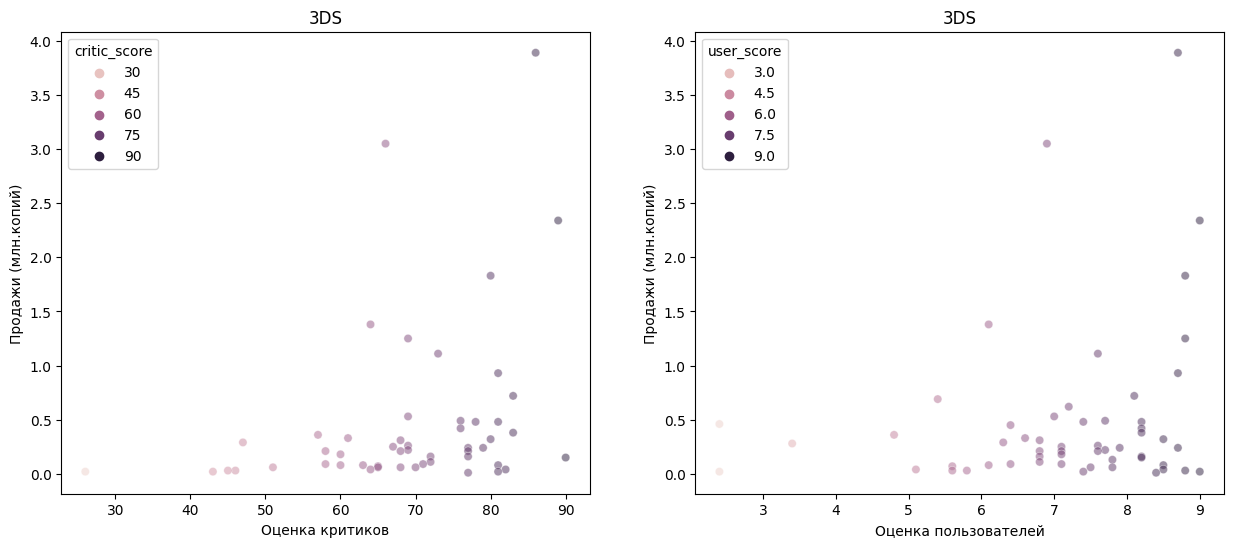

Значение корреляции продаж и оценки критиков для платформы 3DS: 0.31411749286905105
Значение корреляции и оценки пользователей для платформы 3DS: 0.2151932718527028


In [39]:
data_3ds = data_current.query('platform == "3DS"')
print('Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе 3DS')
data_scatter(data_3ds, '3DS')

Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе PS3


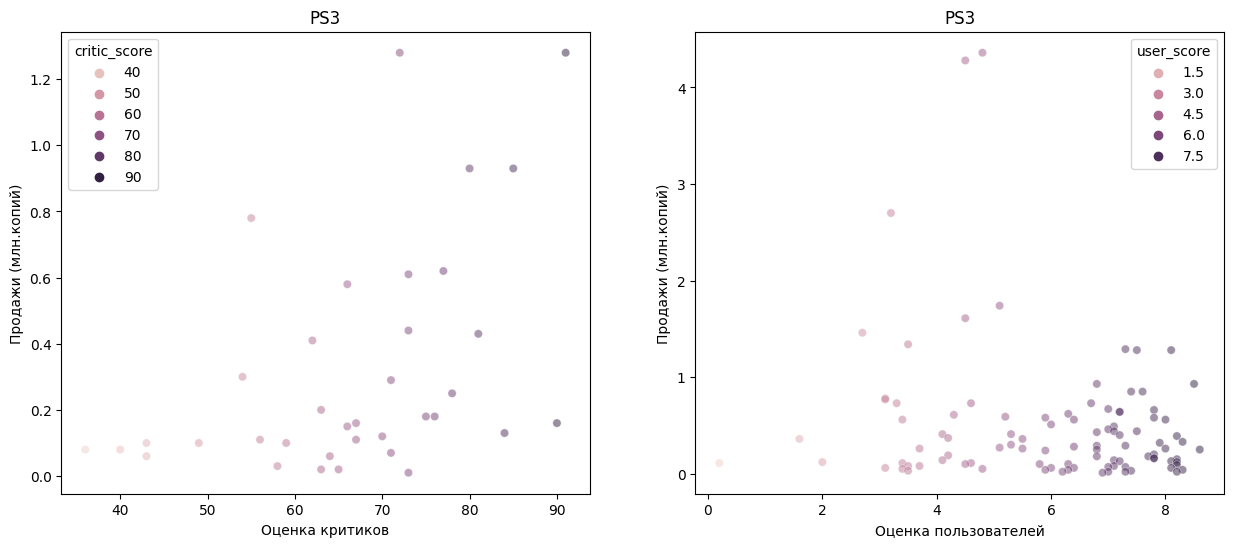

Значение корреляции продаж и оценки критиков для платформы PS3: 0.44657460493190704
Значение корреляции и оценки пользователей для платформы PS3: -0.16676141347662116


In [40]:
data_ps3 = data_current.query('platform == "PS3"')
print('Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе PS3')
data_scatter(data_ps3, 'PS3')

Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе WiiU


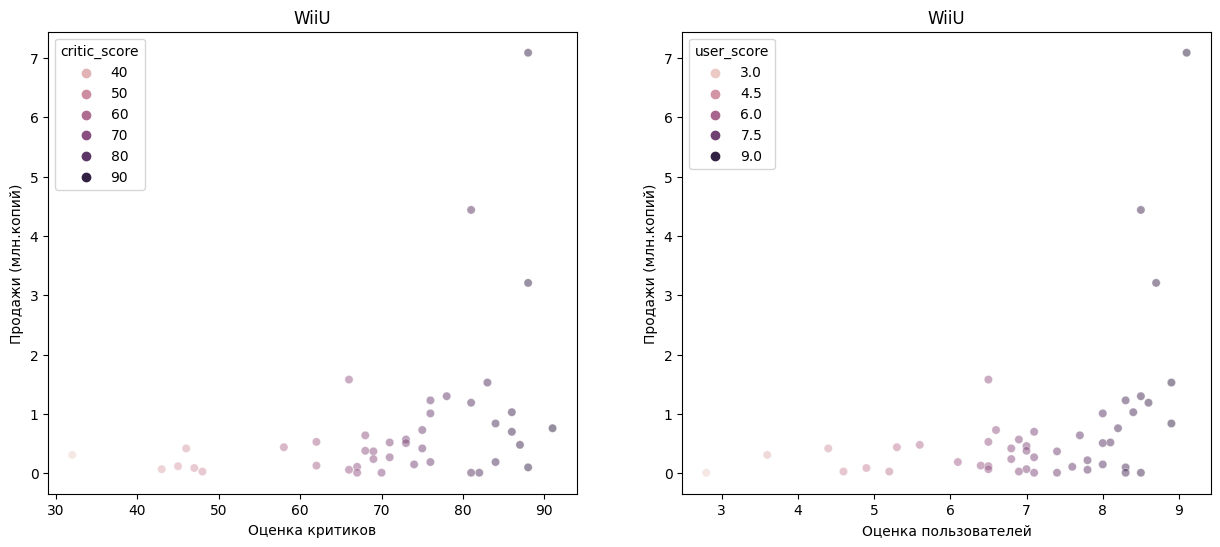

Значение корреляции продаж и оценки критиков для платформы WiiU: 0.370201412480884
Значение корреляции и оценки пользователей для платформы WiiU: 0.4079264579217078


In [41]:
data_wiiu = data_current.query('platform == "WiiU"')
print('Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе WiiU')
data_scatter(data_wiiu, 'WiiU')

Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе X360


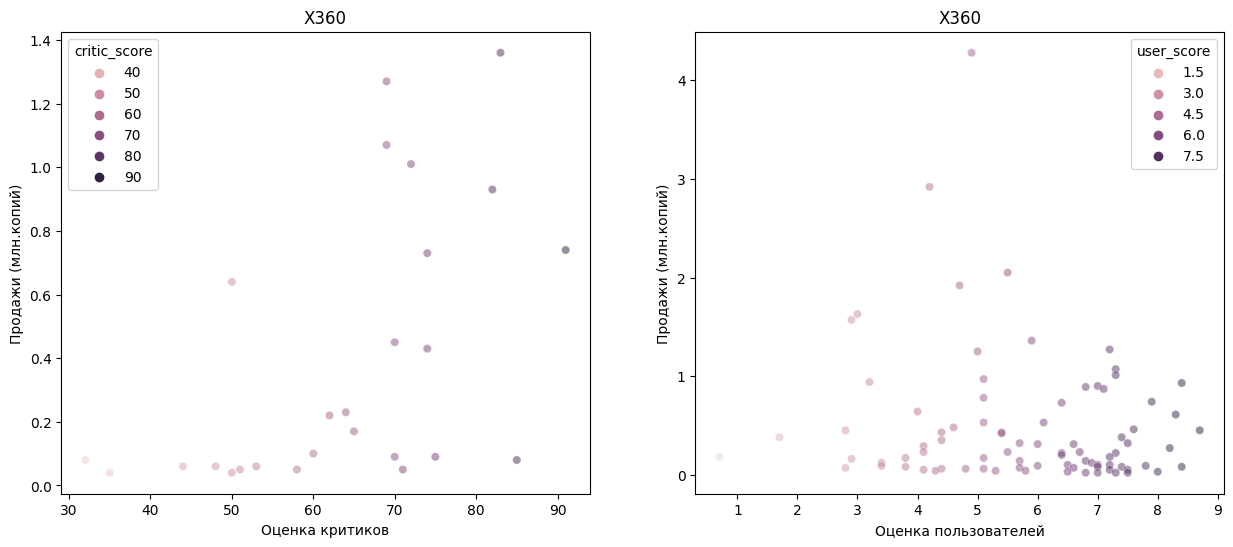

Значение корреляции продаж и оценки критиков для платформы X360: 0.5257228356581523
Значение корреляции и оценки пользователей для платформы X360: -0.138444570945665


In [42]:
data_x360 = data_current.query('platform == "X360"')
print('Диаграммы рассеяния "продажи - оценки критиков и пользователей" на платформе X360')
data_scatter(data_x360, 'X360')

**Вывод:** по всем платформам видна линейная зависимость между количеством продаж и оценкой критиков - чем выше оценка, тем больше продажи. На платформах Nintendo 3DS и WiiU продажи линейно зависят и от оценок пользователей, в отличии от остальных платформ, где этой зависимости нет либо она очень слабая. Отличительный факт платформы WiiU	в том, что продажи зависят от оценки пользователей больше, чем от оценки критиков.

#### Распределение игр по жанрам

Построим диаграмму распределения игр по жанрам за актуальный период 2014-2016:

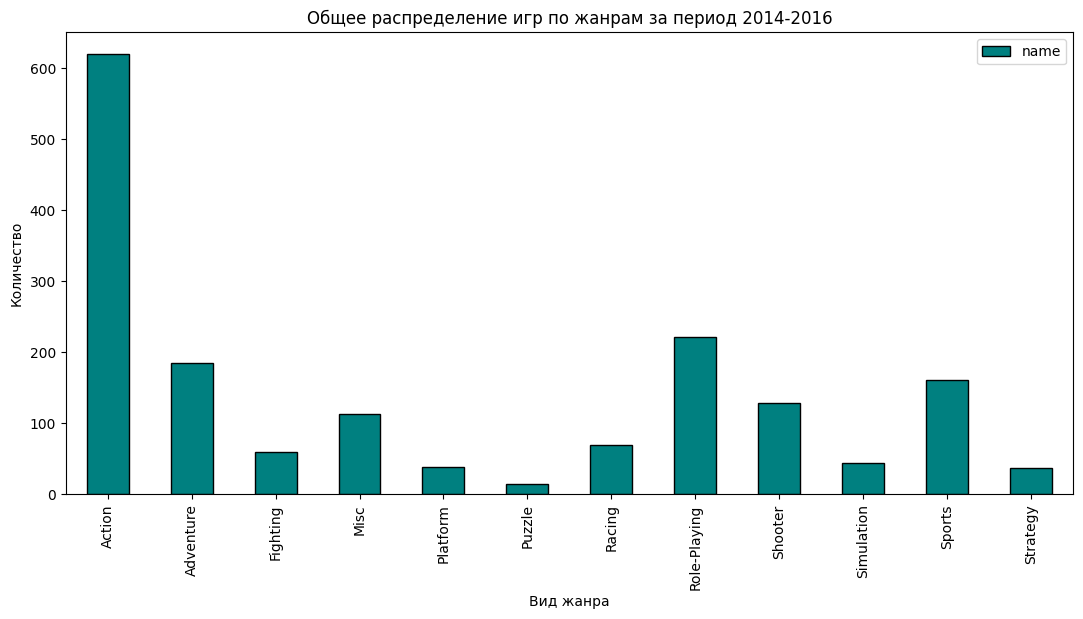

In [43]:
data_current.pivot_table(index='genre', values='name', aggfunc='count').plot(kind='bar', figsize=(13, 6), edgecolor='black', 
                                                                                                          color = 'teal')
plt.title('Общее распределение игр по жанрам за период 2014-2016')
plt.xlabel('Вид жанра')
plt.ylabel('Количество')
plt.show()

**Вывод:** Самый распространенный игровой вид жанра за последние 3 года - это Action, меньше всего игр в жанре Puzzle.

Рассмотрим количество продаж в зависимости от жанра игр на всех платформах:

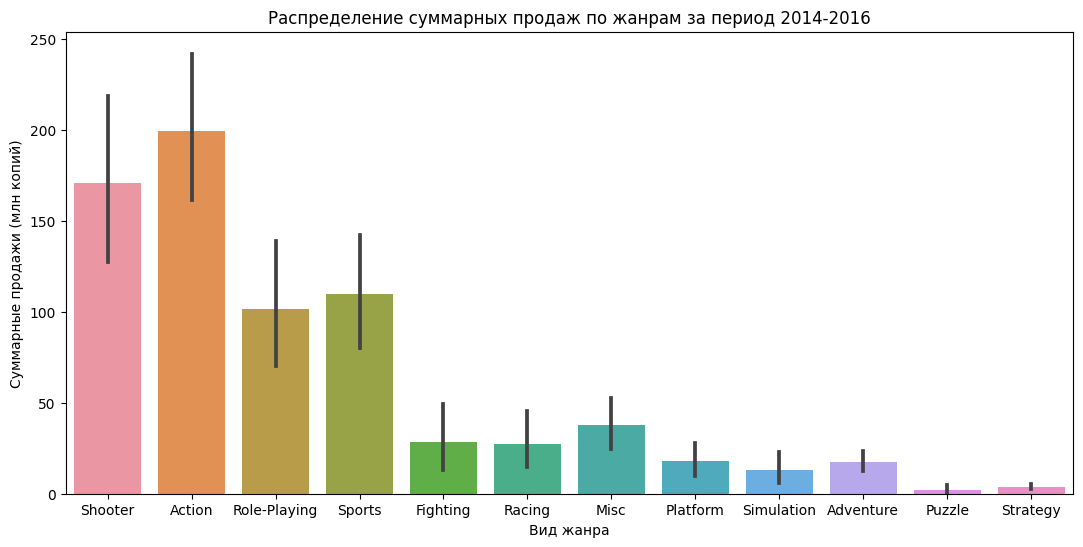

Числовые характеристики:


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


In [44]:
plt.figure(figsize = (13, 6))
seaborn.barplot(data=data_current, x='genre', y='total_sales', estimator=sum)
plt.title('Распределение суммарных продаж по жанрам за период 2014-2016')
plt.xlabel('Вид жанра')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

print('Числовые характеристики:')
data_current.groupby('genre')['total_sales'].describe()

Cамый прибыльный жанр по суммарным продажам - Action, что обусловлено большим количеством игр этого жанра на рынке (619 шт). Больше количество игр - больше продаж - больше прибыль. Самые низкие суммарные продажи у жанров Puzzle, Strategy и Simulation. Топ жанров по суммарным продажам: Action, Shooter и Sports.

Построим диаграмму размаха продаж по жанрам:

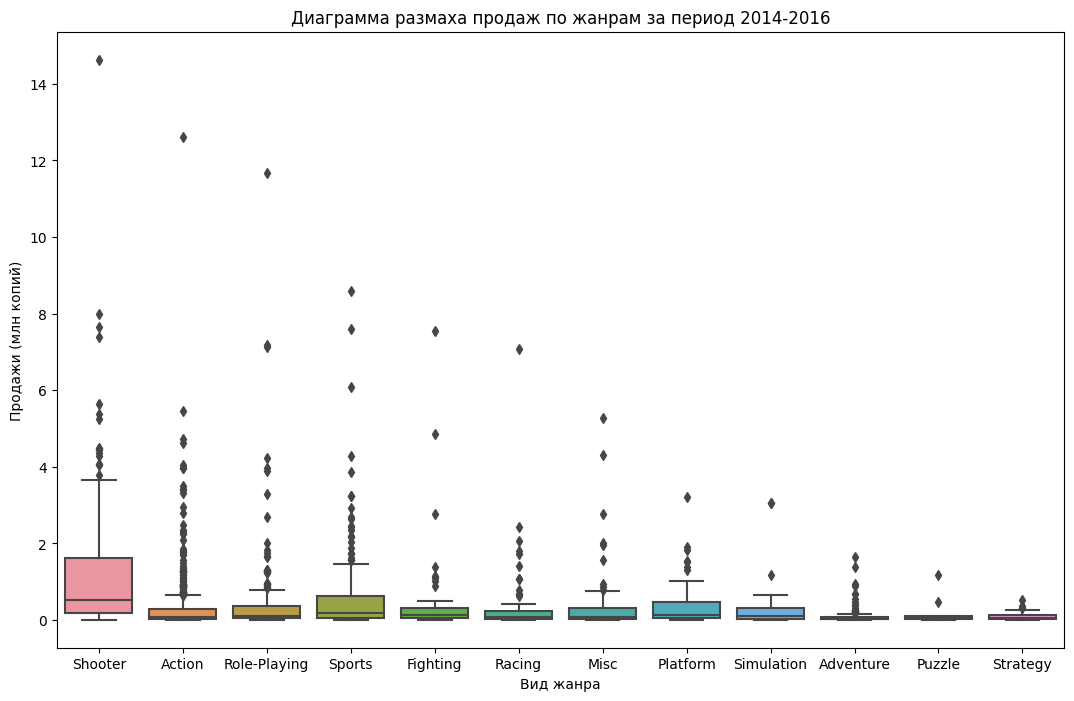

In [45]:
plt.figure(figsize = (13, 8))
seaborn.boxplot(data=data_current, x='genre', y='total_sales')
plt.title('Диаграмма размаха продаж по жанрам за период 2014-2016')
plt.xlabel('Вид жанра')
plt.ylabel('Продажи (млн копий)')
plt.show()

У каждой платформы имеются выбросы - хиты продаж. Ограничим продажи в 2 млн по оси для лучшей визуализации:

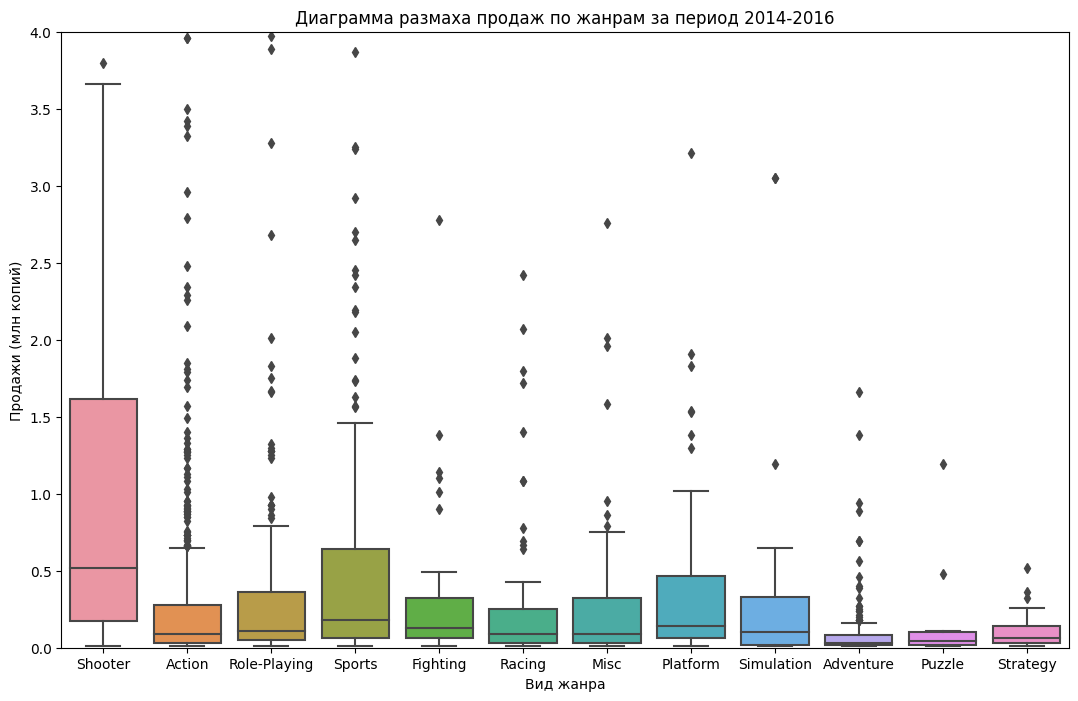

In [46]:
plt.figure(figsize = (13, 8))
plt.ylim(0, 4)
seaborn.boxplot(data=data_current, x='genre', y='total_sales')
plt.title('Диаграмма размаха продаж по жанрам за период 2014-2016')
plt.xlabel('Вид жанра')
plt.ylabel('Продажи (млн копий)')
plt.show()

Диаграммы размаха показывают другую информацию: жанр Shooter имеет более высокий показатель среднего по продажам. За ним идет жанр Sports. А показатели Action значительно ниже. За этим следует вывод, что видеоигры в жанре Action лидируют по продажам из-за некого количества крайне популярных игр-бестселлеров.

**Вывод:** самый прибыльный жанр по суммарным продажам - Action, самые низкие суммарные продажи у жанров Puzzle, Strategy и Simulation. Топ жанров по суммарным продажам: Action, Shooter и Sports. Прибыльность жанра Action в рассмотрении суммарных продаж обусловлена наличием игр-бестселлеров (выбросов). 

Жанром, в котором игры приносят стабильный высокий доход, является Shooter (более высокий показатель среднего по продажам), далее идет Sports.

#### Вывод по разделу

**При выполнении исследовательского анализа данных, имея данные с 1980 по 2016 годы, было определено:**

1. пик индустрии видеоигр приходится на 2008 и 2009 года, выпущено 1427 и 1426 игр соответственно. Меньше всего выпущено в 1980 году - 9 игр. До 1995 года выпускалось до 200 игр в год. В целом заметно, что по мере развития игровой индустрии растет и количество выпущенных игр, но после пиков 2008-2009 годов пошел спад, а с 2012 года количество выпускаемых игр заметно сократилось, что может быть связано с развитием мобильных устройств и соц.сетей, что способствовало снижению интереса к видеоиграм;

2. несомненный лидер продаж - платформа PS2 (PlayStation 2), вместе с ней в топ лидеров входят: PlayStation 3, Xbox 360 (Х360), Wii, Nintendo DS (DS), PlayStation. Т.к. до 1995 года выпускалось менее 200 игр в год, следующий анализ проведен по данным, начиная с 1995 года включительно: рост продаж в среднем длится около 3-5 лет с момента релиза, потом начинается спад. Через 8-10 лет платформа теряет свою популярность. Дольше всех до сильного спада на рынке продержались Xbox 360 (Х360) и PlayStation 3;

3. средний срок существования платформы 7-8 лет, минимальный срок - 1 год (TG16, PCFX, GG), максимальный - 26 лет (PlayStation). Рост продаж в среднем длится около 3-5 лет с момента релиза. Исходя из этого, определен **актуальный период для прогнозирования на 2017 год - с 2014 по 2016 гг.**;

4. шесть самых прибыльных платформ за последние 3 года в порядке убывания: PS4, XOne, 3DS, PS3, X360, WiiU. Но c 2015 заметен спад продаж у большинства платформ. **Перспективными на 2017 год можно считать платформы: PS4, XOne, 3DS**. Общее распределение продаж по платформам говорит о том, что большинство платформ делают ставку на выход бестселлеров, о чем свидетельствуют выбросы. Заметно большое стандартное отклонение и сильное смещение среднего относительно медианы;

5. для оценки влияния оценок критиков и пользователей на продажи взяли для рассмотрения одну из самых популярных платформ за актуальный период (2014-2016) - PlayStation4 (PS4). Для объективной оценки сравнили результат с еще пятью платформами. По всем платформам видна линейная зависимость между количеством продаж и оценкой критиков - чем выше оценка, тем больше продажи. На платформах Nintendo 3DS и WiiU продажи линейно зависят и от оценок пользователей, в отличии от остальных платформ, где этой зависимости нет либо она очень слабая. Отличительный факт платформы WiiU в том, что продажи зависят от оценки пользователей больше, чем от оценки критиков;

6. самый прибыльный жанр по суммарным продажам - Action, самые низкие суммарные продажи у жанров Puzzle, Strategy и Simulation. Топ жанров по суммарным продажам: Action, Shooter и Sports. Прибыльность жанра Action в рассмотрении суммарных продаж обусловлена наличием игр-бестселлеров (выбросов). **Жанром, в котором игры приносят стабильный высокий доход, является Shooter (более высокий показатель среднего по продажам)**, далее идет Sports.

### Портрет пользователя каждого региона

#### Популярные платформы для каждого региона

Определим топ-5 платформ с самыми большими суммарными продажами по регионам за актуальный период 2014-2016 гг.:

In [47]:
top_platform_na = data_current.query('na_sales > 0').pivot_table(index='platform', 
                                                                 values='na_sales', 
                                                                 aggfunc='sum').sort_values(by='na_sales', 
                                                                                            ascending=False).head()
top_platform_eu = data_current.query('eu_sales > 0').pivot_table(index='platform', 
                                                                 values='eu_sales', 
                                                                 aggfunc='sum').sort_values(by='eu_sales', 
                                                                                            ascending=False).head()
top_platform_jp = data_current.query('jp_sales > 0').pivot_table(index='platform', 
                                                                 values='jp_sales', 
                                                                 aggfunc='sum').sort_values(by='jp_sales', 
                                                                                            ascending=False).head()
print('Числовые характеристики для топ-5 платформ региона NA:')
display(top_platform_na)
print('Числовые характеристики для топ-5 платформ региона EU:')
display(top_platform_eu)
print('Числовые характеристики для топ-5 платформ региона JP:')
top_platform_jp

Числовые характеристики для топ-5 платформ региона NA:


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Числовые характеристики для топ-5 платформ региона EU:


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Числовые характеристики для топ-5 платформ региона JP:


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Визуализируем распределение продаж для топ-5 платформ по каждому региону:

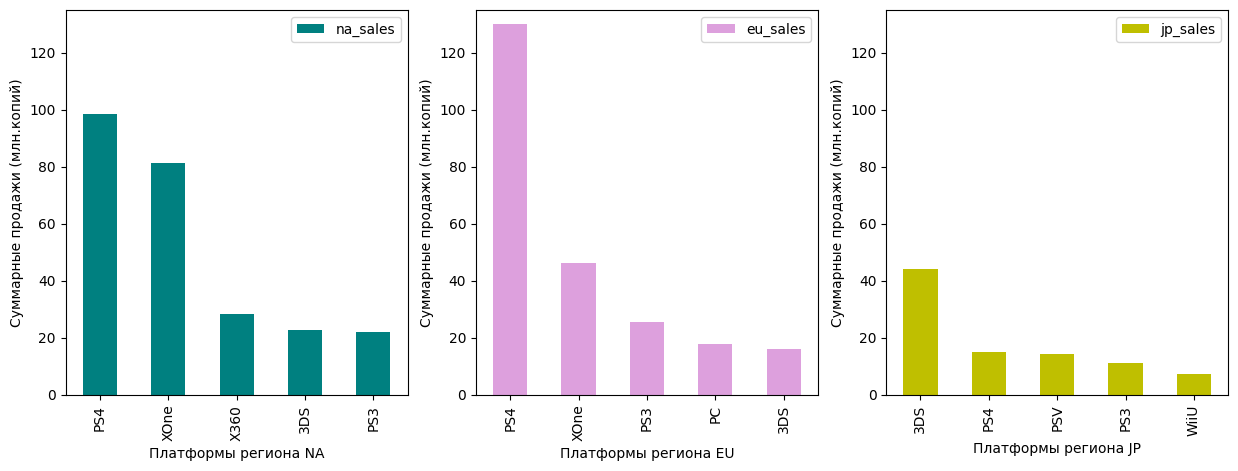

In [48]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
top_platform_na.plot(kind='bar', color = 'teal', ax=axis[0], xlabel='Платформы региона NA', 
                     ylabel='Cуммарные продажи (млн.копий)', ylim=(0, 135))

top_platform_eu.plot(kind='bar', color = 'plum', ax=axis[1], xlabel='Платформы региона EU', 
                     ylabel='Cуммарные продажи (млн.копий)', ylim=(0, 135))

top_platform_jp.plot(kind='bar', color = 'y', ax=axis[2], xlabel='Платформы региона JP', 
                     ylabel='Cуммарные продажи (млн.копий)', ylim=(0, 135))
plt.show()

**Вывод:** 

5 самых популярных платформ в регионе NA: PS4, XOne, X360, 3DS, PS3. 

5 самых популярных платформ в регионе EU: PS4, XOne, PS3, PS, 3DS. 

5 самых популярных платформ в регионе JP: 3DS, PS4, PSV, PS3, WiiU. 

Регионы Северная Америка (NA) и Европа (EU) имеют практически одинаковые предпочтения по платформам - 4 общие платформы. Регион Япония (JP) отличается от вышеуказанных незначительно, здесь лидирует платформа Nintendo 3DS. Общей по популярности платформой для трех регионов является PS4.

#### Популярные жанры для каждого региона

Определим топ-5 жанров с самыми большими суммарными продажами по регионам за актуальный период 2014-2016 гг.:

In [49]:
top_genre_na = data_current.query('na_sales > 0').pivot_table(index='genre', values='na_sales', 
                                                              aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
top_genre_eu = data_current.query('eu_sales > 0').pivot_table(index='genre', values='eu_sales', 
                                                              aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
top_genre_jp = data_current.query('jp_sales > 0').pivot_table(index='genre', values='jp_sales', 
                                                              aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
print('Числовые характеристики для топ-5 жанров региона NA:')
display(top_genre_na)
print('Числовые характеристики для топ-5 жанров региона EU:')
display(top_genre_eu)
print('Числовые характеристики для топ-5 жанров региона JP:')
top_genre_jp

Числовые характеристики для топ-5 жанров региона NA:


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Числовые характеристики для топ-5 жанров региона EU:


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


Числовые характеристики для топ-5 жанров региона JP:


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Визуализируем распределение продаж для топ-5 жанров по каждому региону:

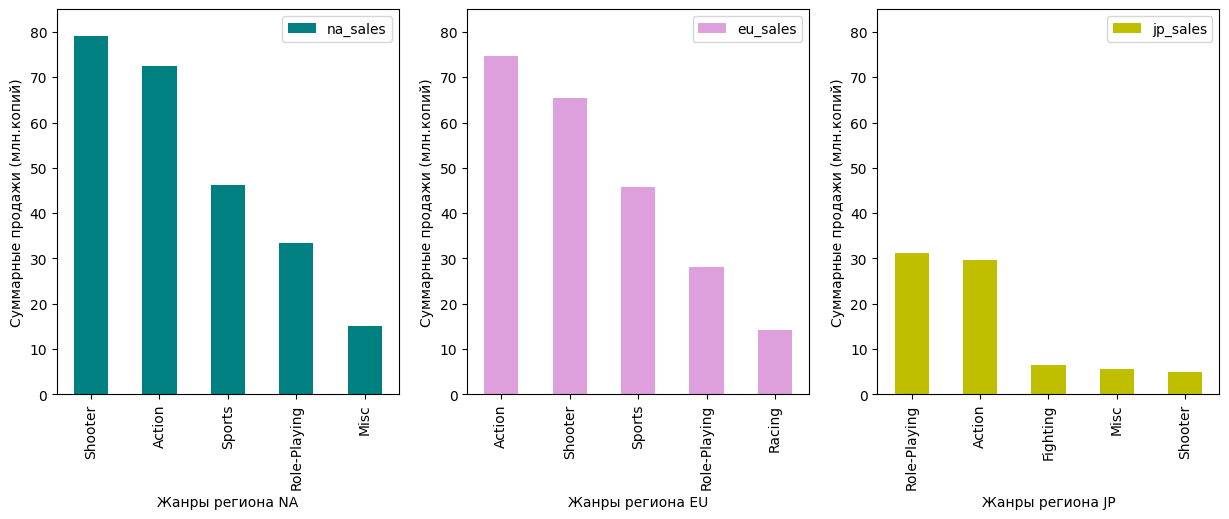

In [50]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
top_genre_na.plot(kind='bar', color = 'teal', ax=axis[0], xlabel='Жанры региона NA', 
                     ylabel='Cуммарные продажи (млн.копий)', ylim=(0, 85))

top_genre_eu.plot(kind='bar', color = 'plum', ax=axis[1], xlabel='Жанры региона EU', 
                     ylabel='Cуммарные продажи (млн.копий)', ylim=(0, 85))

top_genre_jp.plot(kind='bar', color = 'y', ax=axis[2], xlabel='Жанры региона JP', 
                     ylabel='Cуммарные продажи (млн.копий)', ylim=(0, 85))
plt.show()

**Вывод:**

5 самых популярных платформ в регионе NA: Shooter, Action, Sports, Role-Playing, Misc. 

5 самых популярных платформ в регионе EU: Action, Shooter, Sports, Role-Playing, Racing. 

5 самых популярных платформ в регионе JP: Role-Playing, Action, Fighting, Misc, Shooter. 

Регионы Северная Америка (NA) и Европа (EU) имеют практически одинаковые предпочтения по жанрам видеоигр - 4 общих жанра с немного отличающейся популярностью. Регион Япония (JP) отличается от вышеуказанных, здесь предпочитают больше жанр Role-Playing. Общими жанрами трех регионов являются: Action и Shooter.

#### Влияние рейтинга ESRB на продажи

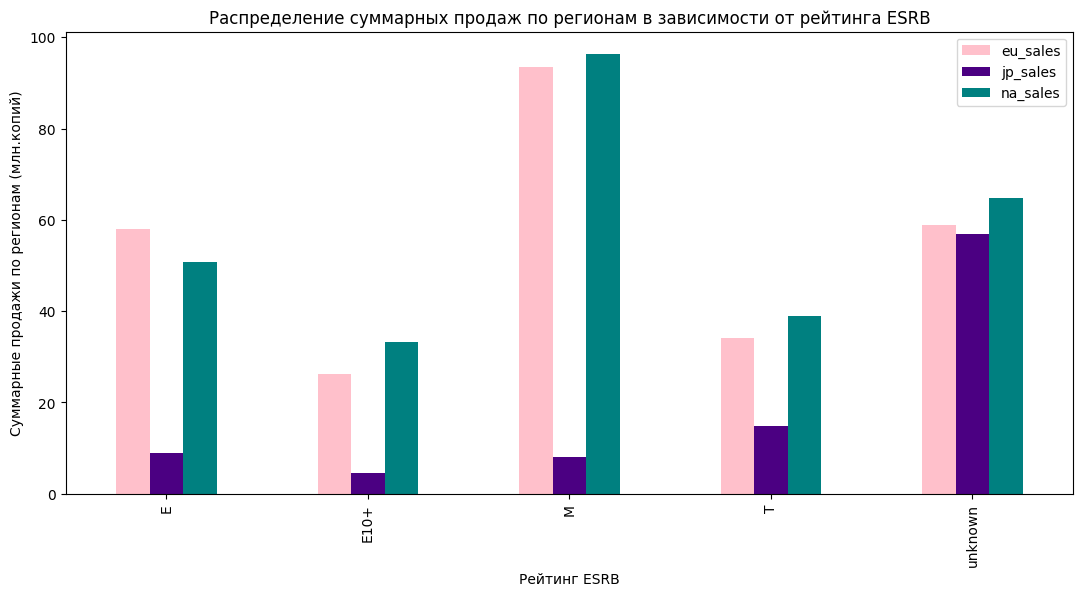

где: 
Е - для всех возрастных категорий;
E10+ - для лиц старше 10 лет;
M - для лиц старше 17 лет;
T - для лиц старше 13 лет;
unknown - рейтинг отсутствует.

Числовые характеристики:


sum                  
        eu_sales jp_sales na_sales
rating                            
E          58.06     8.94    50.74
E10+       26.16     4.46    33.23
M          93.44     8.01    96.42
T          34.07    14.78    38.95
unknown    58.95    56.90    64.72

In [51]:
data_current.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], 
                         aggfunc='sum').plot(kind='bar', figsize=(13, 6), color = ['pink', 'indigo', 'teal'])
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Cуммарные продажи по регионам (млн.копий)')
plt.title('Распределение суммарных продаж по регионам в зависимости от рейтинга ESRB')
plt.show()

print('''где: 
Е - для всех возрастных категорий;
E10+ - для лиц старше 10 лет;
M - для лиц старше 17 лет;
T - для лиц старше 13 лет;
unknown - рейтинг отсутствует.
''')

print('Числовые характеристики:')
data_current.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum'])

**Вывод:** Рейтинг ESRB влияет на продажи в отдельном регионе.

**Регионы NA и EU** имеют одинаковые категории по максимальным и минимальным продажам: самые большие продажи игр в возрастной категории 'М' - старше 17 лет. Менее популярны игры для детей 'Е10+' и 'Т' (возраст 10+ и 13+ соответственно). Но значительное количество продаж имеет неопределенную категорию. Возможно, что видеоигры, попавшие в категорию 'unknown', не планировались для стран Северной Америки, в следствии чего и не получили возрастной рейтинг ESRB, либо произошла ошибка при загрузке данных со сторонних источников.

**Регион JP** отличается от остальных регионов, здесь наиболее популярны игры категории 'Т' (возраст 13+), но значительное количество продаж имеет неопределенную категорию. Возможно, что видеоигры, попавшие в категорию 'unknown', были выпущены только для японской аудитории и не планировались для стран Северной Америки, в следствии чего и не получили возрастной рейтинг ESRB. 

#### Вывод по разделу

Популярность платформ по регионам:
- NA: PS4, XOne, X360, 3DS, PS3.
- EU: PS4, XOne, PS3, PS, 3DS.
- JP: 3DS, PS4, PSV, PS3, WiiU.

Популярность жанров по регионам:
- NA: Shooter, Action, Sports, Role-Playing, Misc.
- EU: Action, Shooter, Sports, Role-Playing, Racing.
- JP: Role-Playing, Action, Fighting, Misc, Shooter.

Регионы Северная Америка и Европа имеют практически одинаковые предпочтения как по платформам, так и по жанрам видеоигр. Японский регион отличается от остальных. Общими жанрами трех регионов являются: Action и Shooter. Общей по популярности платформой для трех регионов является PS4.

Что касается категорий ESRB: Япония так же отличается от остальных регионов, здесь наиболее популярны игры категории 'Т' (возраст 13+), но значительное количество продаж имеет неопределенную категорию. Возможно, что видеоигры, попавшие в категорию 'unknown', были выпущены только для японской аудитории и не планировались для стран Северной Америки, в следствии чего и не получили возрастной рейтинг ESRB. Регионы NA и EU имеют одинаковые категории по максимальным и минимальным продажам: самые большие продажи игр в возрастной категории 'М' - старше 17 лет. Менее популярны игры для детей 'Е10+' и 'Т' (возраст 10+ и 13+ соответственно). Но значительное количество продаж имеет неопределенную категорию. Возможно, что видеоигры, попавшие в категорию 'unknown', не планировались для стран Северной Америки, в следствии чего и не получили возрастной рейтинг ESRB, либо произошла ошибка при загрузке данных со сторонних источников.

Исследование данного раздела проводилось по данным за актуальный период 2014-2016 гг.

### Проверка гипотез

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, обозначим:

**Нулевая гипотеза Н0:** средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC;

**Альтернативная гипотеза Н1:** средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Рассматриваем данные за актуальный период 2014-2016 годы, сохраненные в датафрейме data_current.

In [52]:
# данные с оценками пользователей на платформе Xbox One:
user_score_xone = data_current.query('(platform == "XOne") and (user_score.isna() == False)')['user_score']
# данные с оценками пользователей на платформе PC:
user_score_pc = data_current.query('(platform == "PC") and (user_score.isna() == False)')['user_score']

alpha = 0.05 # обозначим уровень значимости 5%

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 0.11601398086668835
Нет оснований отвергать нулевую гипотезу


**Вывод:** гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не была отвергнута. Таким образом, можно сказать, что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые при уровне статистической значимости 5%, по оценкам пользователей за актуальный период 2014-2016 гг.

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы: средние пользовательские рейтинги жанров Action и Sports разные, обозначим:

**Нулевая гипотеза Н0:** средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports;

**Альтернативная гипотеза Н1:** средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Рассматриваем данные за актуальный период 2014-2016 годы, сохраненные в датафрейме data_current.

In [53]:
# данные с оценками пользователей для жанра Action:
user_score_action = data_current.query('(genre == "Action") and (user_score.isna() == False)')['user_score']
# данные с оценками пользователей для жанра Sports:
user_score_sports = data_current.query('(genre == "Sports") and (user_score.isna() == False)')['user_score']

alpha = 0.05 # обозначим уровень значимости 5%

results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны - была отвергнута в пользу альтернативной. Таким образом, можно сказать, что  средние пользовательские рейтинги жанров Action и Sports разные при уровне статистической значимости 5%, по оценкам пользователей за актуальный период 2014-2016 гг.

#### Вывод по разделу

Для проверки гипотез был выбран метод scipy.stats.ttest_ind - о равенстве средних двух генеральных совокупностей. Для обеих нипотез выбран уровень статистической значимости 5%, рассматриваемый период: 2014-2016гг.

Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не была отвергнута.

Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные - не была отвергнута.

### Общий вывод исследования

**На начальном этапе исследования** были загружены и изучены данные, информация о датасете. 

**На этапе предобработки данных** было выполнено: названия столбцов приведены к нижнему регистру, обработаны явные и неявные дубликаты, пропуски. Преобразованы некоторые столбцы в нужный тип данных. Посчитаны суммарные продажи во всех регионах и результаты добавлены в датафрейм с исходными данными.

**На этапе исследовательского анализа данных** было выполнено: сколько игр выпускалось в разные годы, как менялись продажи по платформам, построены графики распределения продаж по годам. Определен актуальный период для прогнозирования на 2017 г. Выбраны несколько потенциально прибыльных платформ. Построена диаграмма размаха по глобальным продажам игр в разбивке по платформам. Определено как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построены диаграммы рассеяния и посчитана корреляция между отзывами и продажами. Изучено общее распределение игр по жанрам. 

Составлен портрет пользователя каждого региона, проверены 2 гипотезы.

**Итог:** средний срок существования платформы 7-8 лет, рост продаж в среднем длится около 3-5 лет с момента релиза, потом начинается спад. Через 8-10 лет платформа теряет свою популярность. Исходя из этого, определен актуальный период для прогнозирования на 2017 год - с 2014 по 2016 гг.

По всем платформам видна линейная зависимость между количеством продаж и оценкой критиков - чем выше оценка, тем больше продажи. На платформах Nintendo 3DS и WiiU продажи линейно зависят и от оценок пользователей, в отличии от остальных платформ, где этой зависимости нет либо она очень слабая. Отличительный факт платформы WiiU в том, что продажи зависят от оценки пользователей больше, чем от оценки критиков.

Самые прибыльные платформы за последние 3 года: PS4, XOne, 3DS - их можно считать перспективными на 2017 г. 

Самый распространенный и прибыльный вид жанра за последние 3 года - это Action, но его прибыльность обусловлена наличием игр-бестселлеров. Жанром, в котором игры приносят стабильный высокий доход, является Shooter (более высокий показатель среднего по продажам), далее идет Sports. Перспективными жанрами на 2017 год для регионов NA и EU (Северная Америка и Европа) можно считать Shooter, Sports и Action. Для региона JP (Япония) считать перспективными на 2017 г. можно жанры Action, Role-Playing и Adventure.

По возрастным категориям ESRB можно считать перспективными видеоигры: категории 'Т' (возраст 13+) для региона JP (Япония) и категории 'М' (старше 17 лет) для регионов NA и EU (Северная Америка и Европа). Результат получен без учета видеоигр, в которых категория не определена ('unknown').